In [ ]:
from keras.models import Sequential
import tensorflow as tf

import tensorflow_datasets as tfds


In [ ]:
!pip install theano

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 59.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668112 sha256=94641ccbab74c1d9d71f25e952f46b7684f655b497b6ca969240f155f5734631
  Stored in directory: /root/.cache/pip/wheels/84/cb/19/235b5b10d89b4621f685112f8762681570a9fa14dc1ce904d9
Successfully built theano


In [ ]:
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from numpy import *
from PIL import Image
from theano import *
import theano.tensor 
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_test = "/content/drive/MyDrive/mri-image-unzipdata/Alzheimer_s Dataset/train"

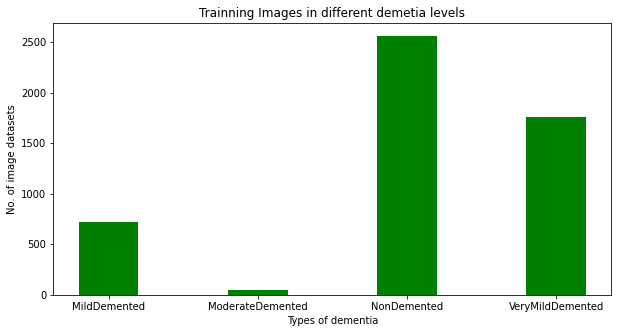

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# creating the dataset
data = {'MildDemented':717, 'ModerateDemented':52, 'NonDemented':2560,
        'VeryMildDemented':1760}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)
 
plt.xlabel("Types of dementia")
plt.ylabel("No. of image datasets")
plt.title("Trainning Images in different demetia levels")
plt.show()

In [ ]:
CATEGORIES = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
DATADIR ="/content/drive/MyDrive/mri-image-unzipdata/Alzheimer_s Dataset/train"

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
target = []
images = []
flat_data = []

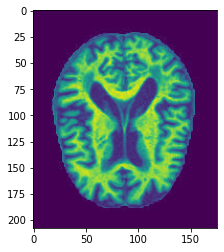

In [ ]:
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                  test_size=0.3,random_state=109)

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'C': [0.1,1,10], 'kernel': ['linear']},
 ]
svc = svm.SVC(probability=True)
classifier = GridSearchCV(svc, param_grid, verbose = 3)
classifier.fit(x_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.950 total time=11.6min
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.955 total time=11.6min


In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred, target_names=CATEGORIES))

In [ ]:
cm_svm =confusion_matrix(y_pred,y_test)
cm_svm_df = pd.DataFrame(cm_svm,
                     index = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'], 
                     columns = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])

In [ ]:
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm_svm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

rf_100 = RandomForestClassifier(max_features=5, n_estimators=100)
rf_100.fit(x_train, y_train)

In [ ]:
y_pred_rbf= rf_100.predict(x_test)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.callbacks import TensorBoard
import pickle
from PIL import Image
import time
import os
from PIL import Image
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

In [ ]:
IMAGE_SIZE = [176,208]               # input image dimensions                                              (176,208)
BATCH_SIZE = 5000
test_split_percent = .1       # % of total data for testing                                         .1
validation_split_percent = .2 # % of total data for validation                                      .2
zoom = [.99,1.01]             # zoom range (for a fixed zoom put the same value in both parameters)[.99,1.01]
bright_range = [.8,1.2]       # brightness range                                                    [.8,1.2] 
layers_unlocked = True        # unlock the imported pre-training layers?                            False  
lr = 0.01                   # learning rate for optimizer                                         0.0001
batch = 20                    # batch size for model fitting                                        20
EPOCHS = 50                     # number of epochs to run                                             50  

In [ ]:
train_dr = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data_gen = train_dr.flow_from_directory(directory="/content/drive/MyDrive/mri-image-unzipdata/Alzheimer_s Dataset/train",target_size=IMAGE_SIZE,
                                              batch_size=BATCH_SIZE)

# Change to zoom = [1,1] to use normal test data
test_dr = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 
test_data_gen = test_dr.flow_from_directory(directory="/content/drive/MyDrive/mri-image-unzipdata/Alzheimer_s Dataset/test",target_size=IMAGE_SIZE,batch_size=BATCH_SIZE,
                                           shuffle = False) # test data should not be shuffle

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.layers import Softmax
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time

In [ ]:
top_model_weights_path = "/content/drive/MyDrive/mri-image-unzipdata/bottleneck_fc_model.h5"
# loading up our datasets
train_data_dir = "/content/drive/MyDrive/mri-image-unzipdata/Alzheimer_s Dataset/train" 
validation_data_dir = "/content/drive/MyDrive/mri-image-unzipdata/Alzheimer_s Dataset/test" 
test_data_dir = "/content/drive/MyDrive/mri-image-unzipdata/Alzheimer_s Dataset/test"
 
# number of epochs to train top model 
epochs = 7 #this has been changed after multiple model run 
# batch size used by flow_from_directory and predict_generator 
batch_size = 10 

In [ ]:
vgg16 = keras.applications.VGG16(include_top=False, weights="imagenet")
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(208, 178), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train) 
 
np.save("bottleneck_features_train.npy", bottleneck_features_train)

Found 5121 images belonging to 4 classes.


<ipython-input-23-0b46cf4bff81>:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)


In [ ]:
generator_top = datagen.flow_from_directory( 
   train_data_dir, 
   target_size=(208, 178), 
   batch_size=32, 
   class_mode="categorical", 
   shuffle=False,
   ) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
train_data = np.load("bottleneck_features_train.npy") 
 
# get the class labels for the training data, in the original order 
train_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 5121 images belonging to 4 classes.


In [ ]:
generator_top = datagen.flow_from_directory( 
   test_data_dir, 
   target_size=(208, 178), 
   batch_size=32, 
   class_mode="categorical", 
   shuffle=False) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
test_data = np.load("bottleneck_features_train.npy") 
 
# get the class labels for the training data, in the original order 
test_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 1279 images belonging to 4 classes.


In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                  
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        #shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.9)

test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255
                                  )

In [ ]:
train_data,train_labels =  train_data_gen.next()
test_data,test_labels = test_data_gen.next()
validate_data, validate_labels = validate_data_gen.next()

In [ ]:
train_data_gen  = train_datagen.flow_from_directory(directory = '/content/drive/MyDrive/mri-image-unzipdata/Alzheimer_s Dataset/train',
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 32)

Found 4098 images belonging to 4 classes.


In [ ]:
validate_data_gen  = valid_datagen.flow_from_directory(directory = '/content/drive/MyDrive/mri-image-unzipdata/Alzheimer_s Dataset/train',
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 32)

Found 514 images belonging to 4 classes.


In [ ]:
test_data_gen  = test_datagen.flow_from_directory(directory = '/content/drive/MyDrive/mri-image-unzipdata/Alzheimer_s Dataset/test',
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 32)

Found 1279 images belonging to 4 classes.


In [ ]:
model = Sequential() 
model.add(Flatten(input_shape=train_data.shape[1:])) 
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.5)) 
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation="softmax"))
model.compile(loss="categorical_crossentropy",
   optimizer="adam",
   metrics=["acc"])
history = model.fit(train_data, train_labels, 
   epochs=250,
   batch_size=16, 
   validation_data=(validate_data, validate_labels))
model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate( 
    test_data, test_labels, batch_size=batch_size,     verbose=1)

Epoch 1/250
2/2 [==============================] - 1s 178ms/step - loss: 11.7123 - acc: 0.2812 - val_loss: 11.0542 - val_acc: 0.2812
Epoch 2/250
2/2 [==============================] - 0s 46ms/step - loss: 20.0717 - acc: 0.2188 - val_loss: 4.0299 - val_acc: 0.2812
Epoch 3/250
2/2 [==============================] - 0s 40ms/step - loss: 24.0765 - acc: 0.3438 - val_loss: 6.4041 - val_acc: 0.5312
Epoch 4/250
2/2 [==============================] - 0s 44ms/step - loss: 23.9972 - acc: 0.4062 - val_loss: 8.4867 - val_acc: 0.2812
Epoch 5/250
2/2 [==============================] - 0s 41ms/step - loss: 19.3014 - acc: 0.4688 - val_loss: 15.6712 - val_acc: 0.2812
Epoch 6/250
2/2 [==============================] - 0s 48ms/step - loss: 21.2331 - acc: 0.5625 - val_loss: 20.2974 - val_acc: 0.2812
Epoch 7/250
2/2 [==============================] - 0s 46ms/step - loss: 23.4351 - acc: 0.3750 - val_loss: 20.0183 - val_acc: 0.2812
Epoch 8/250
2/2 [==============================] - 0s 41ms/step - loss: 40.158

In [ ]:
model = Sequential() 
model.add(Flatten(input_shape=train_data.shape[1:])) 
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.5)) 
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation="softmax"))
model.compile(loss="categorical_crossentropy",
   optimizer=optimizers.RMSprop(lr=1e-4),
   metrics=["acc"])
history = model.fit(train_data, train_labels, 
   epochs=30,
   batch_size=batch_size, 
   validation_data=(train_data, validation_labels))
model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate( 
    validation_data, validation_labels, batch_size=batch_size,     verbose=1)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 15360)             0         
                                                                 
 dense_5 (Dense)             (None, 100)               1536100   
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 4)                 204       
                                                                 
Total params: 1,541,354
Trainable params: 1,541,354
No